## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

### Load the dataset

In [11]:

df = pd.read_csv('C:/Users/niles/Downloads/LAB2/tipss.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [12]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)      
print('The categorical variables are:\n',cat,'\n')
print('The numerical variables are:\n',num)

The categorical variables are:
 ['sex', 'smoker', 'day', 'time'] 

The numerical variables are:
 ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [13]:
df.groupby('day')['total_bill'].mean()

day
Fri     20.825000
Sat     19.994815
Sun     18.092597
Thur     3.070000
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [14]:
df.groupby('sex')['tip'].mean()

sex
Female    2.794571
Male      2.978953
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [15]:
df.groupby('time')['size'].count()

time
Breakfast    21
Dinner       84
Lunch        16
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
df['tip'].describe()

count    5.000000
mean     2.618000
std      1.198361
min      1.010000
25%      1.660000
50%      3.310000
75%      3.500000
max      3.610000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [16]:
df.day.mode()

0    Sun
Name: day, dtype: object

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

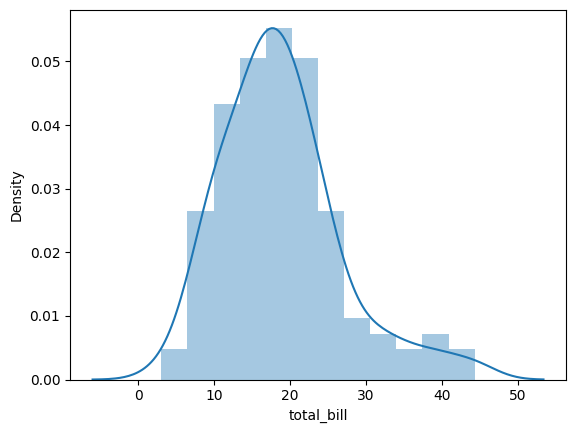

In [17]:
sns.distplot(df['total_bill'])
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [18]:
df['total_bill'].skew()

0.9795860227806658

In [20]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.647878
total_bill,0.647878,1.000000


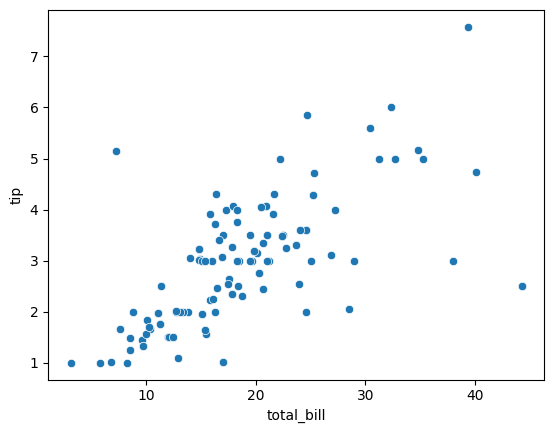

In [21]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

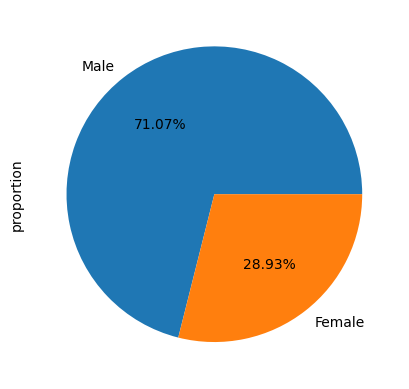

In [22]:
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [23]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        18
        Yes       17
Male    No        49
        Yes       37
Name: count, dtype: int64

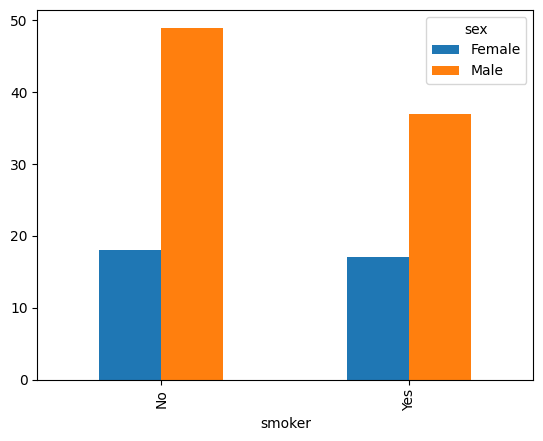

In [24]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [25]:
df.groupby('day')['tip'].mean()

day
Fri     3.051875
Sat     2.868519
Sun     2.944416
Thur    1.000000
Name: tip, dtype: float64

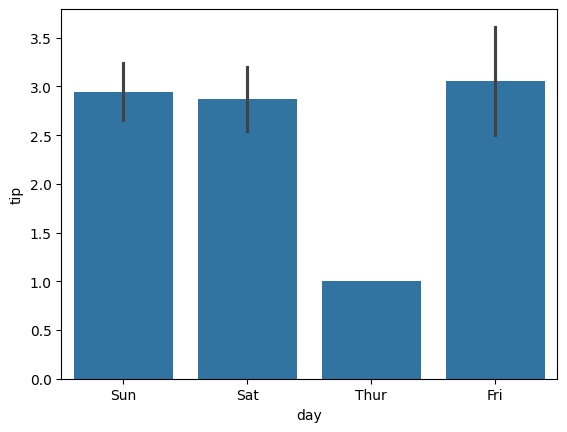

In [26]:
sns.barplot(x='day',y='tip',data=df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

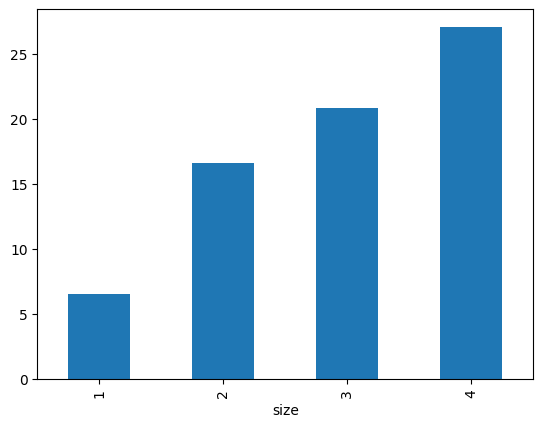

In [27]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

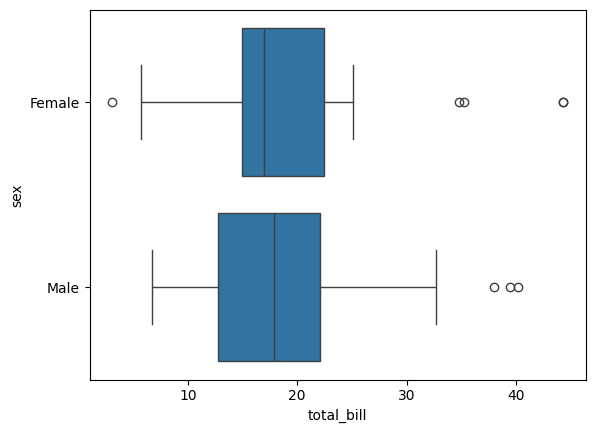

In [28]:
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [29]:
df.groupby(['time','day'])['total_bill'].max()

time       day 
Breakfast  Fri     44.30
           Sat     38.01
           Sun     12.74
Dinner     Fri     40.17
           Sat     44.30
           Sun     39.42
Lunch      Sun     25.08
           Thur     3.07
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [30]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [31]:
len(df[df.duplicated()])

5

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

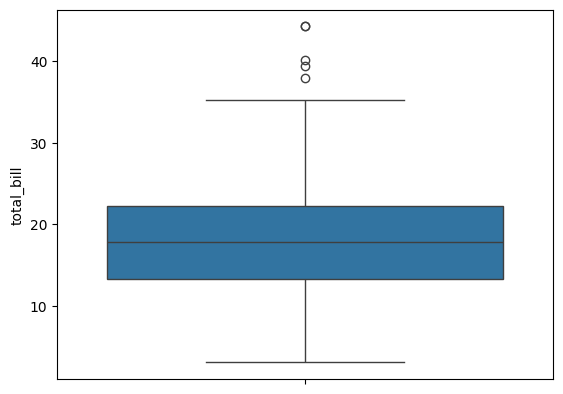

In [34]:
sns.boxplot(df['total_bill'])
plt.show()

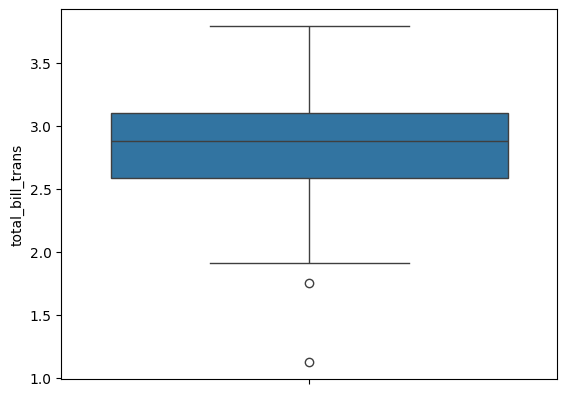

In [35]:
df['total_bill_trans'] = np.log(df['total_bill'])
sns.boxplot(df['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

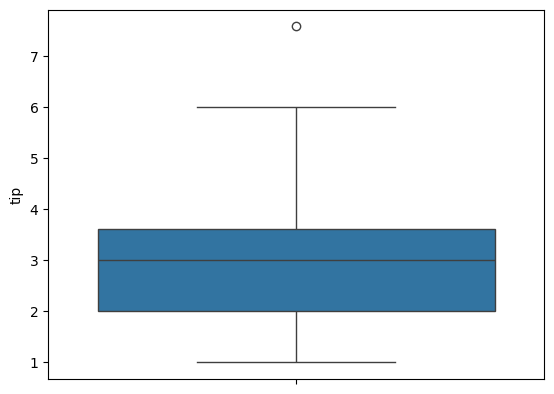

In [36]:
sns.boxplot(df['tip'])
plt.show()

In [37]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)

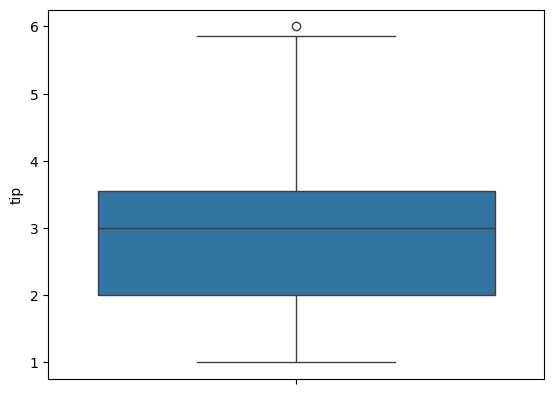

In [38]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)] # rows without outliers
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [39]:
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
79,28.55,2.05,3,3.351657,True,False,False,True,False,True,False
38,26.88,3.12,4,3.291383,True,False,False,True,False,True,False
81,8.52,1.48,2,2.142416,True,True,False,True,False,True,False
78,32.40,6.00,4,3.478158,True,False,False,True,False,True,False
77,22.23,5.00,2,3.101443,True,False,False,True,False,True,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [40]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)

41.23


In [41]:
mm = MinMaxScaler()

In [42]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [46]:
tips_df = pd.read_csv('C:/Users/niles/Downloads/LAB2/tipss.csv')
tips_df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,True,False
1,10.34,1.66,3,True,False,False,True,False,True,False


In [48]:
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

(84, 9) (37, 9)
(84,) (37,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
pred = lr.predict(X_test)

In [52]:
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.46381845021358414


### Happy Learning:)